## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [7]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star1 = star_hdus[1].data
star2 = star_hdus[1].data
star3 = star_hdus[1].data
star4 = star_hdus[1].data
star5 = star_hdus[1].data
star6 = star_hdus[1].data
star7 = star_hdus[1].data
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

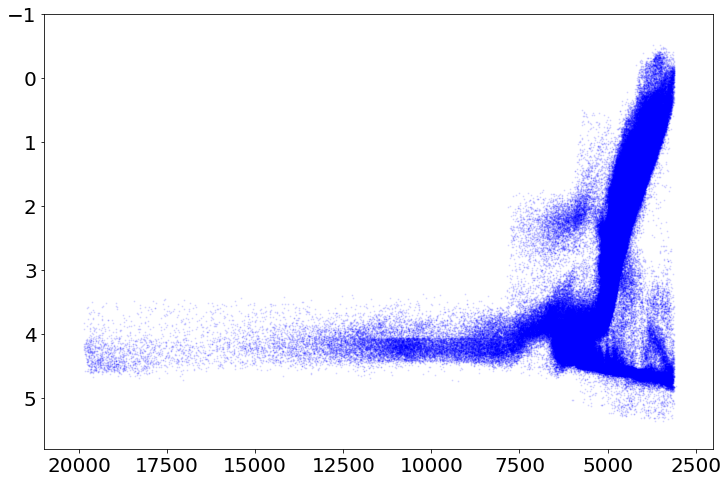

In [8]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

Best-fit values of the parameters:
LINEAR: 0.030, 0.019
POLY3: -0.042, -0.084, 0.006, 0.021
SIGMOID: -0.871, 25.268, 0.070, -0.055


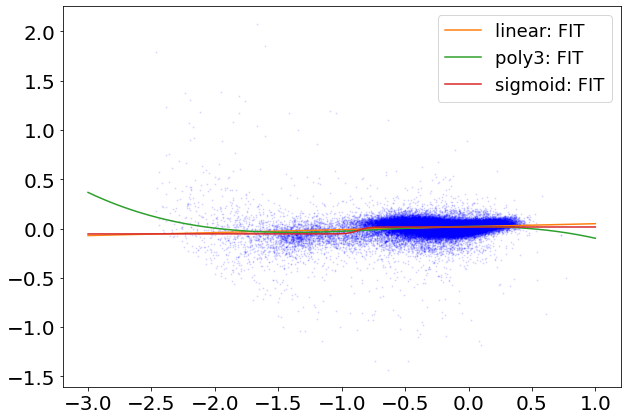

In [9]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['Fe_H'])]
star = star[~np.isnan(star['NI_Fe'])]


# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > 60)
cut1 = np.where(ct1)[0]

print('Best-fit values of the parameters:')
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H'][cut1]/1000, \
                          star['Fe_H'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY3 FIT (4 parameter)
polyA, polyB, polyC, polyD  = mcFit4(poly3, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1],
                         star['NI_FE_ERR'][cut1],p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

## SIGMOID FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(sigmoid, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H'][cut1]/1000,
                            star['FE_H'][cut1]/1000,p0=[0,1,-1,0.5])
print(f'SIGMOID: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['Fe_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['Fe_H'][cut1]),star['NI_FE'][cut1], Fe_H_ERR=(star['Fe_H'][cut1]/1000),
             NI_FE_ERR=(star['NI_FE'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,sigmoid(x_plot, cfA, cfB, cfC, cfD), label='sigmoid: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

In [10]:
print(np.min(star['Fe_H'][cut1]), np.max(star['Fe_H'][cut1]))

-2.4623 0.76844


## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

Best-fit values of the parameters:
LINEAR: -0.000, 1.612
POLY2: 0.000, -0.000, 2.174


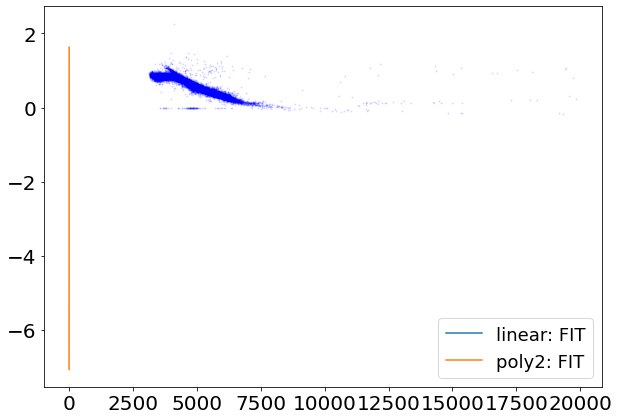

In [73]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star2 = star2[~np.isnan(star2['TEFF'])]
star2 = star2[~np.isnan(star2['J'])]
star2 = star2[~np.isnan(star2['K'])]
star2 = star2[~np.isnan(star2['J_ERR'])]
star2 = star2[~np.isnan(star2['K_ERR'])]
star2 = star2[~np.isnan(star2['TEFF_ERR'])]



# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star2['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star2['starflag'], suspectbits) == 0) &\
     (star2['GLAT'] > 60)
cut1 = np.where(ct1)[0]

print('Best-fit values of the parameters:')
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star2['TEFF'][cut1], (star2['J'] - star2['K'])[cut1], star2['TEFF_ERR'][cut1]/1000, \
                          (np.sqrt((star2['J_ERR']**2)+star2['K_ERR']**2))[cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (4 parameter)
polyA, polyB, polyC  = mcFit3(poly2, star2['TEFF'][cut1], (star2['J'] - star2['K'])[cut1], star2['TEFF_ERR'][cut1]/1000,
                         (np.sqrt((star2['J_ERR']**2)+star2['K_ERR']**2))[cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## Logfit FIT (4 parameter)
#cfA, cfB, cfC, cfD = mcFit4(logfit, star2['TEFF'][cut1], (star2['J'] - star2['K'])[cut1], star2['TEFF'][cut1]/1000,
                            #(np.sqrt((star2['J_ERR']**2)+star2['K_ERR']**2))[cut1]/1000,p0=[0,1,-1,0.5])
#print(f'SIGMOID: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star2['TEFF'][cut1],(star2['J'] - star2['K'])[cut1],s=1,c='b',alpha=0.1)
#ax1.errorbar((star2['TEFF'][cut1]),star2[star2['J'] - star2['K']][cut1], TEFF_ERR=(star2['TEFF'][cut1]/1000),
             #yerr = (star2[star2['J'] - star2['K']][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly2: FIT')
#logfit
#ax1.plot(x_plot,logfit(x_plot, cfA, cfB, cfC, cfD), label='sigmoid: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

Best-fit values of the parameters:
LINEAR: -0.000, 1.612
POLY3: -0.000, 0.000, 0.001, -4.991
COSFIT: 9.654, 0.010, 1.448, -2.576


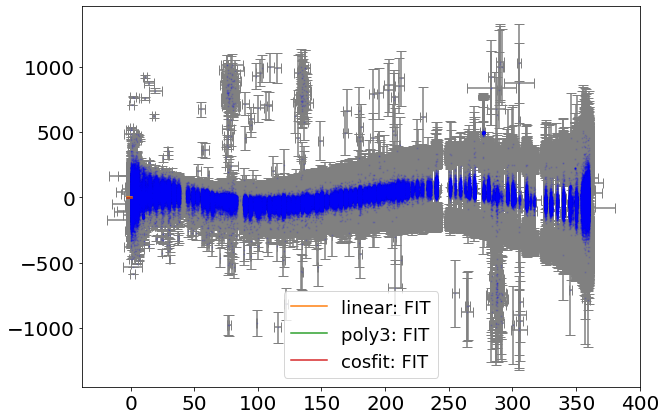

In [44]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star3 = star3[~np.isnan(star3['GLON'])]
star3 = star3[~np.isnan(star3['VHELIO_AVG'])]
star3 = star3[~np.isnan(star3['VERR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star3['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star3['starflag'], suspectbits) == 0) &\
     ((star3['GLAT'] < 10) & (star3['GLAT'] > -10))
cut1 = np.where(ct1)[0]

print('Best-fit values of the parameters:')
## LINEAR FIT (2 parameter)
slope2, intercept2 = mcFit2(linear, star3['GLON'][cut1], (star3['VHELIO_AVG'])[cut1], star3['GLON'][cut1]/1000, \
                          star3['VERR'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY3 FIT (4 parameter)
polyA, polyB, polyC, polyD  = mcFit4(poly3, star3['GLON'][cut1], (star3['VHELIO_AVG'])[cut1], star3['GLON'][cut1],
                         star3['VERR'][cut1],p0=[600,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

##COSFIT
cfA, cfB, cfC, cfD = mcFit4(cosfit, star3['GLON'][cut1], (star3['VHELIO_AVG'])[cut1], star3['GLON'][cut1],
                            star3['VERR'][cut1],p0=[60,0.02,0,0])
print(f'COSFIT: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star3['GLON'][cut1],(star3['VHELIO_AVG'])[cut1],s=1,c='b',alpha=0.1)
ax1.errorbar(star3['GLON'][cut1], (star3['VHELIO_AVG'])[cut1], star3['GLON'][cut1],
                            star3['VERR'][cut1], ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,cosfit(x_plot, cfA, cfB, cfC, cfD), label='cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISTIS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

Best-fit values of the parameters:
LINEAR: 0.133, 0.626
POLY3: -0.000, 0.000, 0.054, 0.899


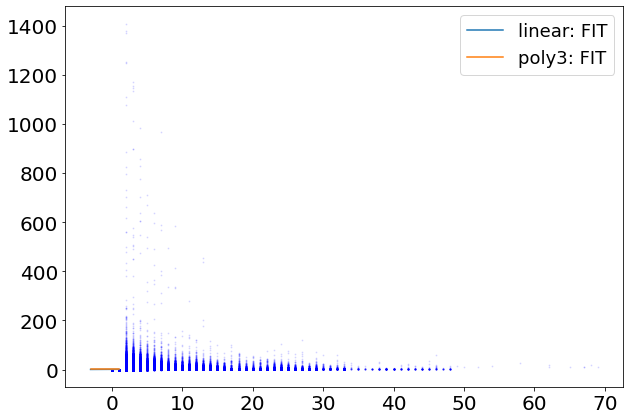

In [83]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star4 = star4[~np.isnan(star4['NVISTIS'])]
star4 = star4[~np.isnan(star4['VSCATTER'])]
star4 = star4[~np.isnan(star4['VERR'])]


# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['NVISTIS'] >= 1)
cut1 = np.where(ct1)[0]

print('Best-fit values of the parameters:')
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star4['NVISTIS'][cut1], star4['VSCATTER'][cut1], star4['NVISTIS'][cut1]/1000, \
                          star4['VSCATTER'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

#paramA, paramb, paramC, paramD =  mcFit4(exponential, star4['NVISTIS'][cut1], (star4['VSCATTER'])[cut1], star4['NVISTIS'][cut1],
                         #star4['VERR'][cut1],p0=[600,1,1,1])
#print(f'EXPONENTIAL: {paramA:.3f}, {paramb:.3f}, {paramC:.3f}, {paramD:.3f}')

## POLY3 FIT (4 parameter)
polyA, polyB, polyC, polyD  = mcFit4(poly3, star4['NVISTIS'][cut1], (star4['VSCATTER'])[cut1], star4['NVISTIS'][cut1],
                         star4['VERR'][cut1],p0=[600,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star4['NVISTIS'][cut1],(star4['VSCATTER'])[cut1],s=1,c='b',alpha=0.1)

# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()


## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

Best-fit values of the parameters:
LINEAR: -1.267, -1.028
POLY2: 0.004, -1.461, -0.700
POLY3: -0.000, 0.009, -1.578, -0.544


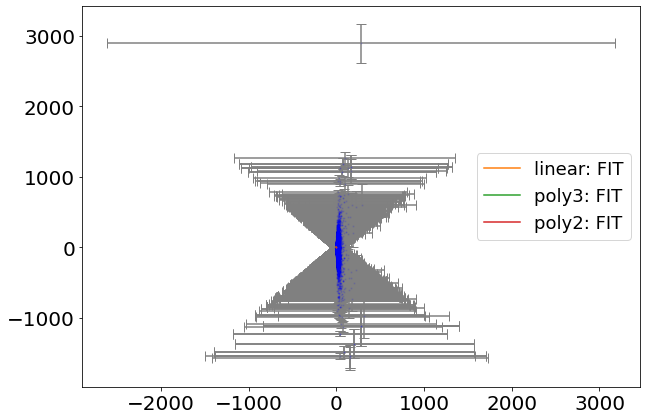

In [85]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star5 = star5[~np.isnan(star5['RA'])]
star5 = star5[~np.isnan(star5['GAIA_PMRA'])]
star5 = star5[~np.isnan(star5['GAIA_PMRA_ERROR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
cut1 = np.where(ct1)[0]

print('Best-fit values of the parameters:')
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star5['GAIA_PARALLAX'][cut1], star5['GAIA_PMRA'][cut1], star5['GAIA_PARALLAX'][cut1]/1000, \
                          star5['GAIA_PARALLAX'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT
polyA, polyB, polyC  = mcFit3(poly2, star5['GAIA_PARALLAX'][cut1], star5['GAIA_PMRA'][cut1], star5['GAIA_PARALLAX_ERROR'][cut1]/1000,
                         star5['GAIA_PMRA_ERROR'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## POLY3 FIT
polyA, polyB, polyC, polyD  = mcFit4(poly3, star5['GAIA_PARALLAX'][cut1], star5['GAIA_PMRA'][cut1], star5['GAIA_PARALLAX_ERROR'][cut1],
                         star5['GAIA_PMRA_ERROR'][cut1],p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star5['GAIA_PARALLAX'][cut1],(star5['GAIA_PMRA'])[cut1],s=1,c='b',alpha=0.1)
ax1.errorbar(star5['GAIA_PARALLAX'][cut1], (star5['GAIA_PMRA'])[cut1], star5['GAIA_PARALLAX'][cut1],
                            star5['GAIA_PMRA'][cut1], ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#poly2
ax1.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly2: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

Best-fit values of the parameters:
LINEAR: 0.000, 1.772
POLY2: -0.000, 0.001, -0.554
POLY3: -0.000, 0.000, -0.000, 3.126


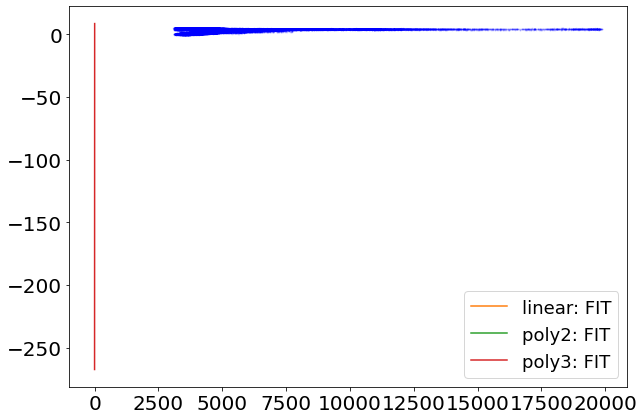

In [68]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star6 = star6[~np.isnan(star6['TEFF'])]
star6 = star6[~np.isnan(star6['TEFF_ERR'])]
star6 = star6[~np.isnan(star6['LOGG'])]
star6 = star6[~np.isnan(star6['LOGG_ERR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['TEFF'] < 6000) & (star['LOGG'] > 3)
cut1 = np.where(ct1)[0]

print('Best-fit values of the parameters:')
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star6['TEFF'][cut1], star6['LOGG'][cut1], star6['TEFF'][cut1]/1000, \
                          star6['TEFF'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT
polyA, polyB, polyC  = mcFit3(poly2, star6['TEFF'][cut1], star6['LOGG'][cut1], star6['TEFF'][cut1]/1000,
                         star6['TEFF_ERR'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## POLY3 FIT (4 parameter)
polyA, polyB, polyC, polyD  = mcFit4(poly3, star6['TEFF'][cut1], star6['LOGG'][cut1], star6['TEFF'][cut1],
                         star6['TEFF_ERR'][cut1],p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star6['TEFF'][cut1],star6['LOGG'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star6['TEFF'][cut1]),star6['LOGG'][cut1], TEFF_ERR=(star6['TEFF'][cut1]/1000),
             LOGG_ERR=(star6['LOGG'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='poly2: FIT')
##poly3 fit
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

Best-fit values of the parameters:
LINEAR: -1.267, -1.028
POLY2: 0.004, -1.461, -0.700
POLY3: -0.000, 0.009, -1.578, -0.544


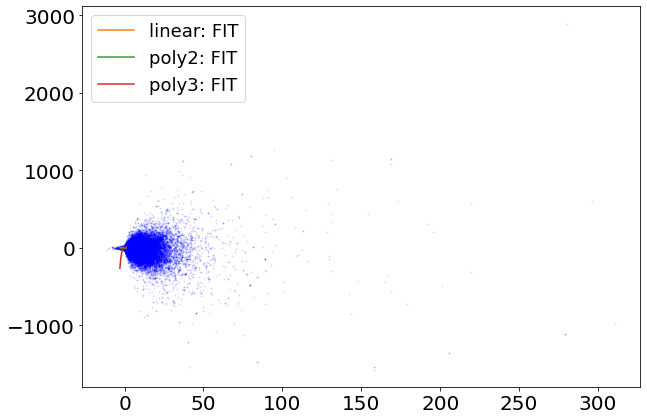

In [70]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star7 = star7[~np.isnan(star7['GAIA_PARALLAX'])]
star7 = star7[~np.isnan(star7['GAIA_PARALLAX_ERROR'])]
star7 = star7[~np.isnan(star7['GAIA_PMRA'])]
star7 = star7[~np.isnan(star7['GAIA_PMRA_ERROR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
cut1 = np.where(ct1)[0]

print('Best-fit values of the parameters:')
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star7['GAIA_PARALLAX'][cut1], star7['GAIA_PMRA'][cut1], star7['GAIA_PARALLAX'][cut1]/1000, \
                          star7['GAIA_PARALLAX'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT
polyA, polyB, polyC  = mcFit3(poly2, star7['GAIA_PARALLAX'][cut1], star7['GAIA_PMRA'][cut1], star7['GAIA_PARALLAX_ERROR'][cut1]/1000,
                         star7['GAIA_PMRA_ERROR'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

polyA, polyB, polyC, polyD  = mcFit4(poly3, star7['GAIA_PARALLAX'][cut1], star7['GAIA_PMRA'][cut1], star7['GAIA_PARALLAX_ERROR'][cut1],
                         star7['GAIA_PMRA_ERROR'][cut1],p0=[1,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star7['GAIA_PARALLAX'][cut1],star7['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star7['GAIA_PARALLAX'][cut1]),star7['GAIA_PMRA'][cut1], GAIA_PARALLAX_ERROR=(star7['GAIA_PARALLAX'][cut1]/1000),
             GAIA_PMRA_ERROR=(star7['GAIA_PMRA'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='poly2: FIT')
##poly3 fit
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()